In [27]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [60]:
%%capture !pip install nbdev

UsageError: %%capture is a cell magic, but the cell body is empty.


## Computer Vision
PET CLASSIFIER using [Oxford-IIIT Pet Dataset](https://www.robots.ox.ac.uk/~vgg/data/pets/)
### About dataset
- Dataset contains images of cats and dogs
- Contains data of 37 breeds

**Annotation Methods Used**
- .trimaps used for providing hints for separation between foreground and background
- list which provide annotation with index based on categories and filenames
- Name of the file (If Title case then cat else dog)

In [29]:
# Importing Dependency
from fastai.vision.all import *
path = untar_data(URLs.PETS)

In [30]:
print('BasePath: ',path,'\n', path.ls())
import os
os.path.exists(path/'images')

BasePath:  /root/.fastai/data/oxford-iiit-pet 
 [Path('/root/.fastai/data/oxford-iiit-pet/images'), Path('/root/.fastai/data/oxford-iiit-pet/models'), Path('/root/.fastai/data/oxford-iiit-pet/annotations')]


True

In [31]:
files = get_image_files(path/'images')
print(len(files))   #Number of files
files

7390


(#7390) [Path('/root/.fastai/data/oxford-iiit-pet/images/beagle_115.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/boxer_18.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Maine_Coon_157.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/scottish_terrier_28.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/english_setter_6.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_79.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/boxer_128.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Persian_265.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Maine_Coon_182.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/keeshond_89.jpg')...]

In [32]:
def label_function(f): return 'Cat' if f[0].isupper() else 'Dog'

dls = ImageDataLoaders.from_name_func(path,
                                      files,
                                      label_function,
                                      seed = 0.42,
                                      valid_pct = 0.2,
                                      item_tfms=Resize(224))
dls

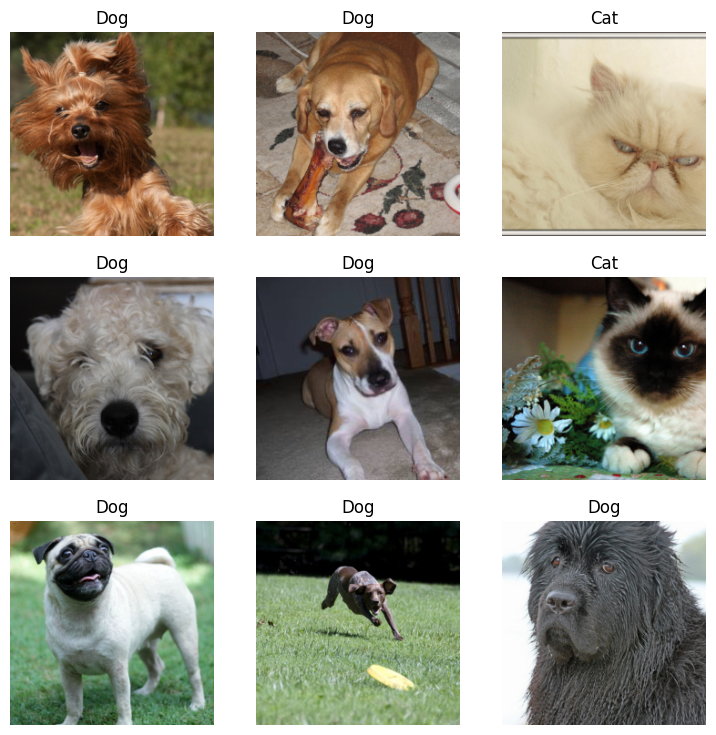

In [33]:
dls.show_batch()

In [34]:
learn = vision_learner(dls, resnet34, metrics = error_rate)

In [35]:
learn.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.144985,0.016168,0.004060,00:27


epoch,train_loss,valid_loss,error_rate,time
0,0.066897,0.023703,0.008119,00:35
1,0.029152,0.004171,0.002030,00:35


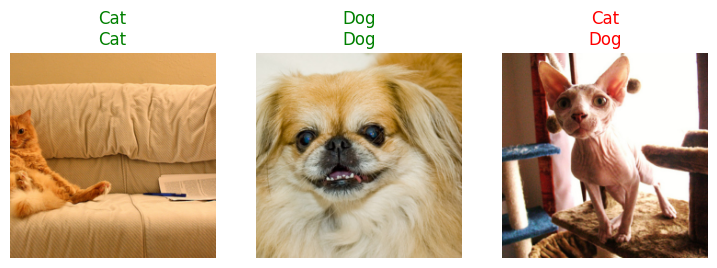

In [58]:
doc(learn.show_results)
learn.show_results(max_n = 3)

### Comparing other pretrained model
We will be using resnet18 and convnext for comparision

In [74]:
!pip show timm

Name: timm
Version: 0.9.12
Summary: PyTorch Image Models
Home-page: https://github.com/huggingface/pytorch-image-models
Author: Ross Wightman
Author-email: ross@huggingface.co
License: 
Location: /opt/conda/lib/python3.10/site-packages
Requires: huggingface-hub, pyyaml, safetensors, torch, torchvision
Required-by: 


In [73]:
import timm
timm.list_models('convnext*') # Prints available model

<module 'timm' from '/opt/conda/lib/python3.10/site-packages/timm/__init__.py'>


['convnext_atto',
 'convnext_atto_ols',
 'convnext_base',
 'convnext_femto',
 'convnext_femto_ols',
 'convnext_large',
 'convnext_large_mlp',
 'convnext_nano',
 'convnext_nano_ols',
 'convnext_pico',
 'convnext_pico_ols',
 'convnext_small',
 'convnext_tiny',
 'convnext_tiny_hnf',
 'convnext_xlarge',
 'convnext_xxlarge',
 'convnextv2_atto',
 'convnextv2_base',
 'convnextv2_femto',
 'convnextv2_huge',
 'convnextv2_large',
 'convnextv2_nano',
 'convnextv2_pico',
 'convnextv2_small',
 'convnextv2_tiny']

In [61]:
learn18 = vision_learner(dls, resnet18, metrics = error_rate)
learn18.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.150697,0.026258,0.010825,00:25


epoch,train_loss,valid_loss,error_rate,time
0,0.052905,0.014251,0.005413,00:26
1,0.021968,0.009595,0.003383,00:26


In [75]:
learnCon = vision_learner(dls, 'convnext_nano', metrics = error_rate)
learnCon.fine_tune(2)

model.safetensors:   0%|          | 0.00/62.4M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.065353,0.003996,0.001353,00:37


epoch,train_loss,valid_loss,error_rate,time
0,0.017113,0.003469,0.002030,01:01
1,0.017393,0.001775,0.000677,01:01


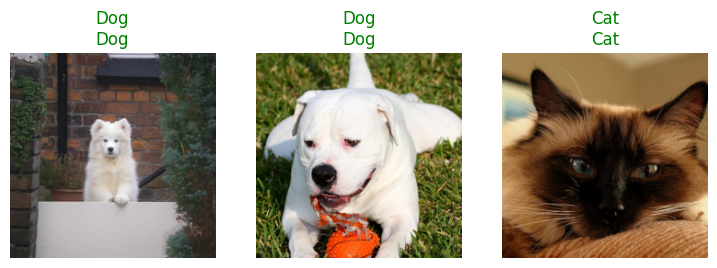

In [78]:
learnCon.show_results(max_n = 3)

Compared different models
- Resnet 34 
- Resnet 18
- ConvNext_Nano

Outcome:
While considering model, following things can be a factor which can be considered : 
- size of the model: Whether the model will fit in gpu while fine tuning?
- Smaller model or less layered Nueral network will be quicker to train but accuracy will be compromised.
- In circumstances where accuracy is primary factor and predication are made extremely critical situation; then more accurate model should be preferred.

## Train Breed Identifier
We will be using from_name_re (identifies label from path using re)

beagle_115.jpg


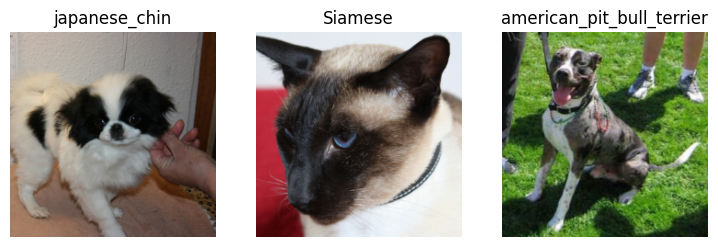

In [37]:
print(files[0].name)
re = r'^(.*)_\d+.jpg'
breedDls = ImageDataLoaders.from_name_re(path,
                              files,
                              re, item_tfms = Resize(224))
breedDls.show_batch(max_n = 3)

In [49]:
breedLearner = vision_learner(breedDls, resnet34, metrics = error_rate)       

In [50]:
breadLearner.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.005605,0.009426,0.002706,00:27


epoch,train_loss,valid_loss,error_rate,time
0,0.032482,0.014724,0.005413,00:34
1,0.010015,0.012728,0.004060,00:34


SuggestedLRs(minimum=0.012022644281387329, steep=0.00363078061491251, valley=0.0014454397605732083, slide=0.001737800776027143)

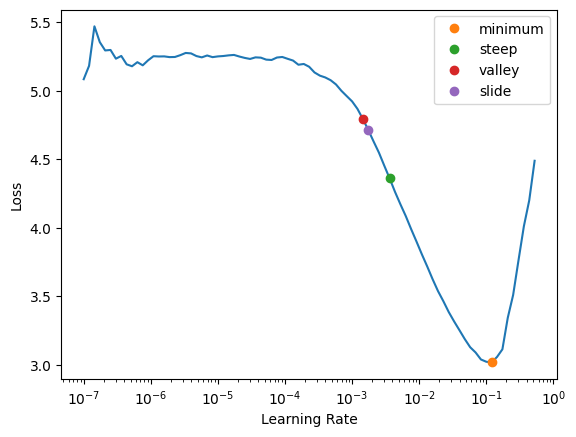

In [51]:
#Breed Learner2 Contains the learning rate suggested by learning rate finder
breedLearner2 = vision_learner(breedDls, resnet34, metrics = error_rate)
breedLearner2.lr_find(suggest_funcs=(minimum, steep, valley, slide)) 

In [57]:
breedLearner2.fine_tune(5, 0.0015)

epoch,train_loss,valid_loss,error_rate,time
0,0.074799,0.281808,0.077131,00:28


epoch,train_loss,valid_loss,error_rate,time
0,0.076059,0.301440,0.079838,00:34
1,0.127226,0.319454,0.083221,00:34
2,0.084575,0.308161,0.081191,00:34
3,0.042925,0.258806,0.071719,00:34
4,0.026000,0.259886,0.067659,00:35
